In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
from src import *

In [3]:
# load data
df_name = "mnist"
inputs, labels = load_data(df_name)

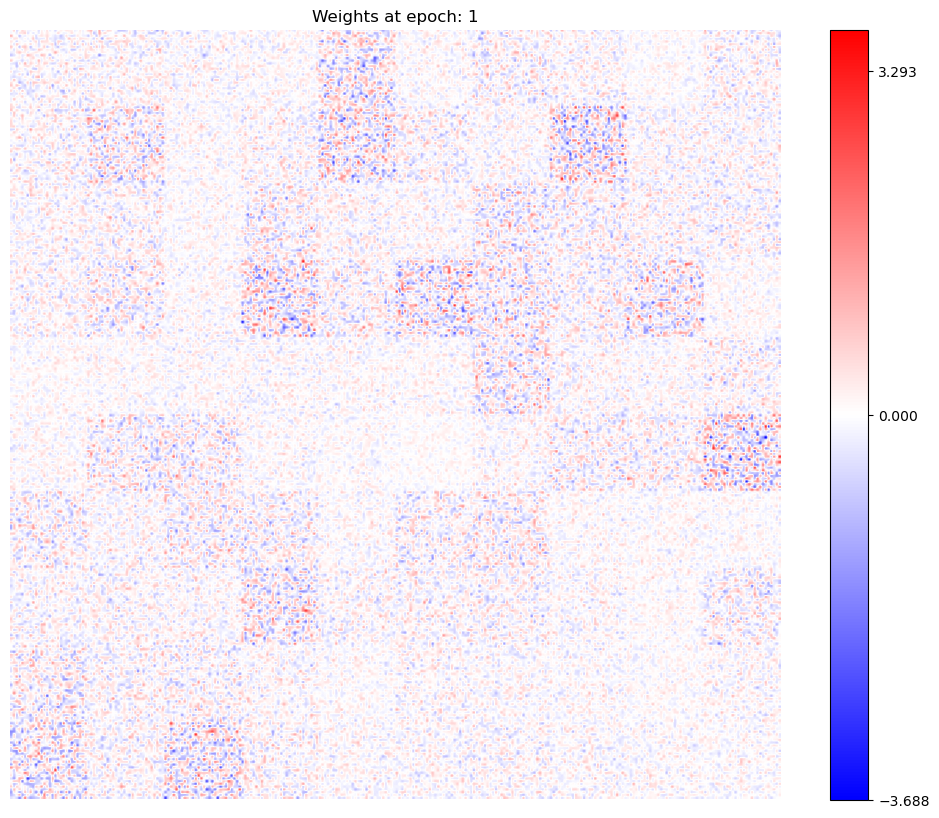

In [4]:
# train unsupervised layer 
n_hidden = 100
n_epochs = 1
weights = biolearning(inputs, n_hidden, n_epochs, df_name, show=True)
save_weights(weights, df_name, notes=f"Epoch{n_epochs}_{n_hidden}hidden")

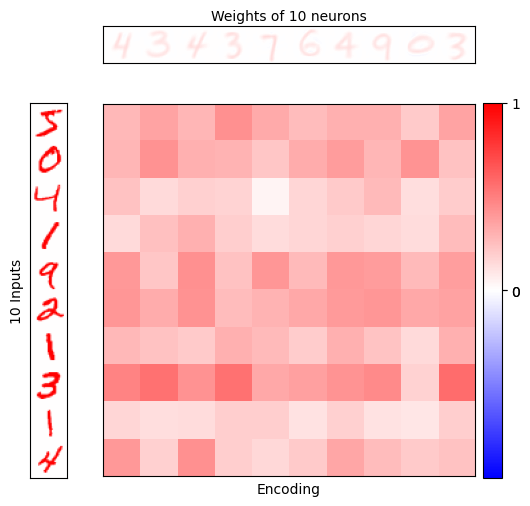

In [5]:
# "encoding" all the inputs by running them through unsupervised layer
n_hidden = 100
n_epochs = 200
weights = load_weights(df_name, notes=f"Epoch{n_epochs}_{n_hidden}hidden")
encoding = np.dot(weights, inputs.T)
# encoding = np.where(encoding<0, 0, encoding) # RELU <- performance on xor better without relu and seems to be more stable (line go down all the time whereas with relu, line only go down some of the time)
encoding /= np.max(np.absolute(encoding))
encoding = encoding.T # make encoding have shape (n_samples, n_hidden)

frankensteining(weights, inputs, encoding, df_name)

[[0.27965056 0.35884888 0.28658407 ... 0.31363974 0.45056443 0.37436155]
 [0.28642912 0.42363891 0.30875812 ... 0.34995601 0.40377589 0.27912996]
 [0.23988986 0.14603429 0.18191095 ... 0.13254707 0.13323649 0.0779308 ]
 ...
 [0.41891727 0.36257958 0.38975103 ... 0.55866918 0.33943888 0.23208612]
 [0.25126701 0.44744433 0.23374713 ... 0.24619102 0.35666491 0.19013326]
 [0.40211102 0.72755086 0.38354833 ... 0.56101162 0.59702051 0.35297287]]


pred [[ 0.92029116 -0.9999997  -0.99998695 -0.96809887 -0.99500657 -0.94488572
   0.85789759  0.99999576  0.96159523 -0.95798344]
 [ 0.5945746  -0.99994108 -0.99970555 -0.94624439 -0.94963109 -0.88192999
   0.90469719  0.99935172  0.96835489 -0.71541481]
 [ 0.88925504 -0.99999138 -0.99996412 -0.96690416 -0.59901164 -0.97718769
   0.95832296  0.99961666  0.9186047  -0.63270606]
 [ 0.80807013 -0.99999301 -0.99999842 -0.99995028 -0.99705722 -0.71123183
   0.99732276  0.99999989  0.97684178 -0.86368135]
 [ 0.84007853 -0.99995551 -0.99855331 -0.84963439

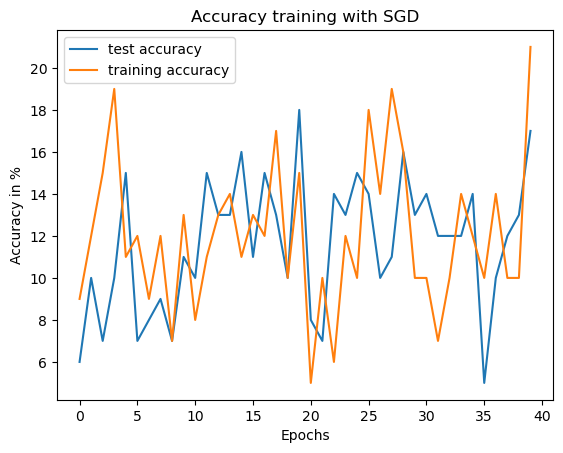

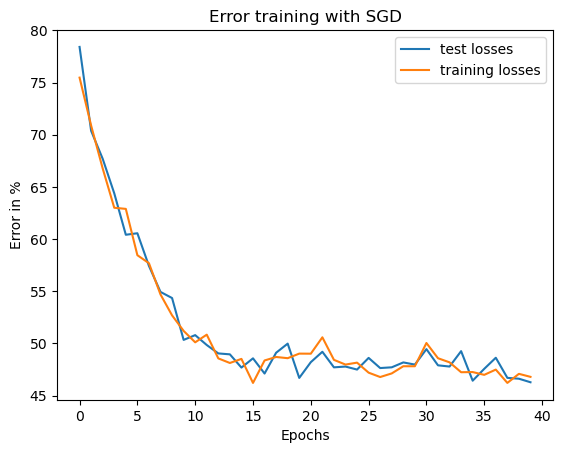

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:

# train supervised trainer 
train = Trainer(n_inputs = n_hidden, n_outputs = labels.shape[1])
train.training_loop(encoding, labels)
train.visualize_accuracy(df_name, show=True)
train.visualize_error(df_name, show=True)